In [2]:
# 당뇨병
from sklearn.datasets import load_diabetes
diabetes =load_diabetes() # buanch class

In [3]:
# 데이터의 크기 확인하기
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


> data는 422개의 행과 10개의 열로 구성된 2차원 배열입니다.     
> target은 422개의 요소를 가진 1차원 배열입니다.   
> 여기서 422개를 Sample갯수라고 하면 10개를 특성(Feature)갯수라고 합니다.

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
# data 일부 보기 (0~2번 Sample)
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [6]:
# target의 일부 보기
diabetes.target[:3]

array([151.,  75., 141.])

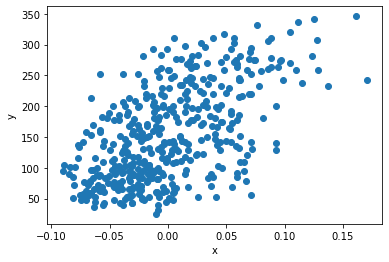

In [7]:
# 당뇨병 환자데이터 시각화 하기 (data의 3번째 Feauture와 Target)
import matplotlib.pyplot as plt

plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
# 상관계수 알아보기
import numpy as np

np.corrcoef(diabetes.data[:,2], diabetes.target)

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

---
# 경사 하강법
: 경사하강법은 모델이 데이터를 잘 표현할 수 있도록 기울기(변화율)을 사용하여 모델을 조금씩 조정하는 최적화 알고리즘

# 예측값과 변화율
## 예측값 (y^)
예측값은 하나의 모델에서 수식의 결과로 나온 값을 의미 합니다.        

## 훈련데이터에서 장 맞는 w와 b를 찾는 방법
1. 무작위로 w와 b를 정합니다.   
2. x에서 샘플하나를 선택하여 y^을 계산합니다.   
3. y^과 선택한 샘플의 진짜 y를 비교합니다. (예측한 값과 정답 비교하기 : 오차 구하기)
4. y^이 y와 가까워지도록 w,b를 조정합니다 (모델 조정하기 : 학습하기)
5. 모든 샘플을 처리할때까지 2)~4)항목을 반복합니다.     

In [9]:
# 훈련데이터의 Feature와 Target 정하기

x = diabetes.data[:,2]
y = diabetes.target

# 5개만 출력하기
print(x[:5])
print(y[:5])

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469]
[151.  75. 141. 206. 135.]


In [10]:
# w와 b를 초기화 하기 : 무작위로 그냥 weight와 Bias를 1로 선택
w = 1.0
b = 1.0

In [11]:
# 훈련데이터의 첫번째 Sample 데이터로 y^ 계산하기
y_hat = x[0] * w + b
y_hat

1.0616962065186886

In [12]:
# Target과 예측 데이터 비교하기
print(y_hat)
print(y[0])

1.0616962065186886
151.0


> 당연한 결과지만 Target과 예측값이 너무 많은 차이가 발생

## w값을 조절하기
: w와 b를 조금씩 변경해서 y_hat이 증가하는지 감소하는지 살펴보기

In [13]:
# 기존 w에 0.1만 증가해보기
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
y_hat_inc

1.0678658271705574

> y_hat보다 y_hat_inc가 조금더 Target에 근접해짐

In [14]:
# w값 조정한후 예측값 정도 확인하기
# w가 0/1증가 했을때 y_hat이 얼마나 증가했는지 계산해보기 (변화율 확인하기)
w_rate =(y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.061696206518688734

> w_rate(변화율)이 x[0]의 값과 동일한다. ****

In [15]:
# 0.1로 하여서 그런가? 0.2로 바꾸어서 계산해보자
w_inc = w + 0.2
y_hat_inc = w_inc * x[0] + b
w_rate =(y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.06169620651868769

In [16]:
# 훈련데이터의 2번째 값(음수)로 테스트 해보자
w_inc = w + 0.1
y_hat = x[1] * w + b
y_hat_inc = w_inc * x[1] + b
w_rate =(y_hat_inc - y_hat) / (w_inc - w)
w_rate

-0.05147406123880644

In [17]:
# 변화율에 대한 증명이 끝났으니 다시 훈련데이터의 1번째 값으로 변화율을 구해보자

w=b=1
y_hat = x[0] * w + b
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
w_rate = (y_hat_inc - y_hat) / (w_inc -w)
w_rate

0.061696206518688734

In [18]:
# 변화율로 가중치를 업데이트 하기 <- 학습하기
w_new = w + w_rate
w_new

1.0616962065186888

In [19]:
# 변화율로 절편 업데이트 하기 <- 학습하기
b_inc = b + 0.1
y_hat_inc = w * x[0] + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc -b)
print(b_rate)

1.1616962065186887
1.0


In [20]:
b_new = b + 1
b_new

2

In [21]:
# 여기까지 하고 다시 돌아가 준다 단, 오차율(y^-y)을 곱해서 돌아간다.
# 오차 역전파로 가중치와 절편을 업데이트 합니다. -> 손실함수(비율함수)를 구성합니다.
# 오차 역전파(backpropagation)는 y^과 y의 차이를 이용하여 w와 b를 업데이트 합니다.
# 오차와 변화율을 곱하여 가중치 업데이트 하기

err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + b_rate * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [22]:
# 2번째 샘플 x[1]을 사용하여 오차를 구하고 새로운 w와 b를 구하기
y_hat = w_new * x[1] + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new +  w_rate * err
b_new =b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [23]:
# 반복문을 통환 전체 샘플을 반복하기

w=b=1
for x_i, y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w,b)
# y = wx + b 의 w와b를 구한것이다.

587.8654539985689 99.40935564531424


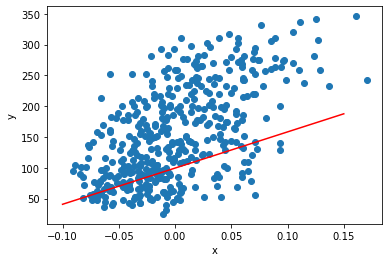

In [24]:
# 그래프로 확인해 보기

plt.scatter(x,y)

# 산포도에서 x축 범위를 보면 -0.1 ~ 0.15의 범위
pt1 =(-0.1, -0.1 * w + b)
pt2 =(0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r') # r =red
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [25]:
# Epoch로 반복하기 : w와 b를 반복적으로 계산해보기

w=b=1
for _ in range(100):
  for x_i, y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w,b)

913.5973364345905 123.39414383177204


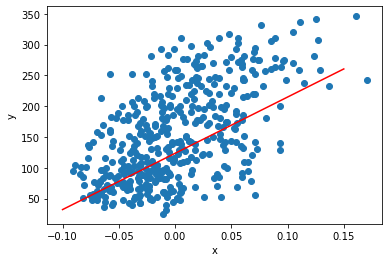

In [26]:
# 그래프로 확인해 보기

plt.scatter(x,y)

# 산포도에서 x축 범위를 보면 -0.1 ~ 0.15의 범위
pt1 =(-0.1, -0.1 * w + b)
pt2 =(0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r') # r =red
plt.xlabel('x')
plt.ylabel('y')

plt.show()

> y_ = 913.6X +123.4

In [27]:
# 모델로 예측하기
x_new = 0.18
y_pred = x_new * w + b
y_pred

287.8416643899983

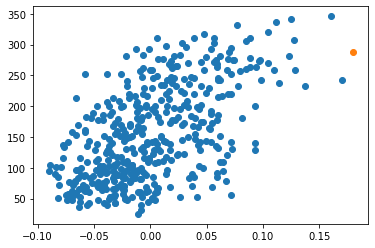

In [28]:
plt.scatter(x,y)
plt.scatter(x_new, y_pred)
plt.show()

---
# 모델 만들기 정리
1. w와 b를 임의의 값(1,1)로 초기화하고 훈련데이터의 샘플을 하나씩 대입하여 y와 y^의 오차를 구한다.
2. 1.에서 구한 오차를 w와 b의 변화율에 곱하고 이 값을 이용하여 w와 b를 업데이트한다. (학습한다.)
3. 만약 y^이 y보다 커지는 오차는 음수가 되어 자동으로 w와 b가 줄어드는 방향으로 업데이트가 된다.
4. 반대로 y^이 y보다 작으면 오차는 양수가 되어 w와 b는 더 커지도록 업데이트가 된다.

# 선형 회구를 위한 Class 만들기

In [31]:
class LRModel:
    # 초기화 작업
    def __init__(self):
        self.w = 1.0 # 가중치를 초기화
        self.b = 1.0 # 절편을 초기화

    # 정방향 계산
    def forpass(self, x):
        y_hat = x * self.w + self.b # 직선 방정식을 계산
        return y_hat
        
    # 역방향 계산
    def backprop(self, x, err):
        w_grad = x * err # 가중치에 대한 그래디언트를 계산
        b_grad = 1 * err # 절편에 대한 그래디언트를 계산
        return w_grad, b_grad
        
    # 훈련
    def fit(self, x, y, epoch):
        for _ in range(epoch):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i)
                err = (y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w += w_grad
                self.b += b_grad
        return self.w, self.b

In [32]:
lrmodel =LRModel()
w,b = lrmodel.fit(x,y,100)
print(w,b)

913.5973364345905 123.39414383177204


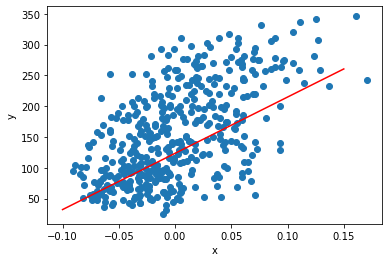

In [33]:
# 그래프로 확인해 보기

plt.scatter(x,y)

# 산포도에서 x축 범위를 보면 -0.1 ~ 0.15의 범위
pt1 =(-0.1, -0.1 * w + b)
pt2 =(0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r') # r =red
plt.xlabel('x')
plt.ylabel('y')

plt.show()

---
# 용어정리
### 선형회귀 (log - regression - 인공신경망 -DL)
선형방정식을 사용하여 연속적인 값을 예측하는 아록리즘으로 데이터를 가장 잘 표현하는 방정삭의 계수를 구할 수 있습니다.     
머신러닝 알고리즘 이지만 딥러닝에서 사용하는 인공신경망 알고리즘의 기초가 됩니다.     


### 경사하강법
최적화 알고리즘 중의 하나로 핵심 훈련 알고리즘입니다.     
이 방법을 최적의 모델을 만드는 가중치를 한번에 찾지 않습니다.     
먼저 임의로 정한 가증치에서 출력을 만든후 타깃과 비교하요 오창를 줄이는 방향으로 가중치를 조정합니다.     
이런 과정의 모든 훈련샘플에 대해서 반복하면서 푀적의 가중치를 찾습니다.      

### 손실 함수
모델이 얼마만큼의 오류가 있는지 측정하는 기준 입니다.     
손실함수의 값을 최소로 만드는 것이 이 모델 훈련의 목적 입니다.     
다른 말로는 비용함수 또는 목적함수라고도 부릅니다.    